In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/sajanshergill/Downloads/wine/wine_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


a) Find the optimal p value of Minkowski Lᵨ for the nearest neighbor classifier. Try
p = 0.5 ∼ 2.5 incremented by 0.1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:668: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:668: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:668: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:668: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:668: UserWarning: Mind th

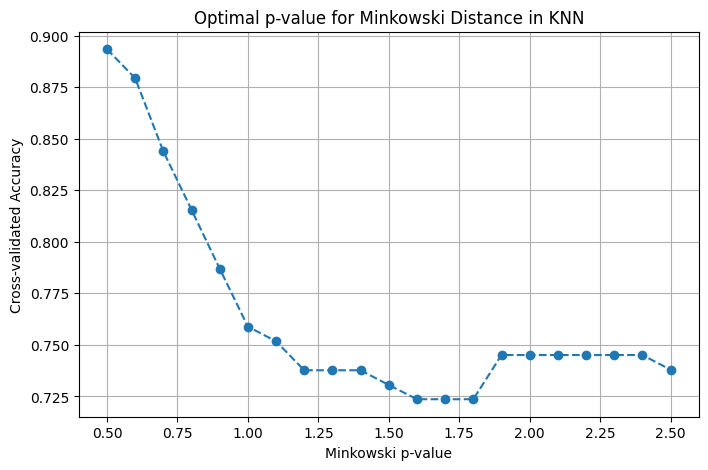

(0.5, 0.8933497536945814)

In [18]:
# Define column names based on the UCI Wine dataset
column_names = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

# Rename the columns
df.columns = column_names

# Split data into features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different Minkowski p-values from 0.5 to 2.5 with step 0.1
p_values = np.arange(0.5, 2.6, 0.1)
accuracy_scores = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=p)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the optimal p-value
optimal_p = p_values[np.argmax(accuracy_scores)]
optimal_accuracy = max(accuracy_scores)

# Plot accuracy vs p-values
plt.figure(figsize=(8, 5))
plt.plot(p_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel("Minkowski p-value")
plt.ylabel("Cross-validated Accuracy")
plt.title("Optimal p-value for Minkowski Distance in KNN")
plt.grid(True)
plt.show()

# Output the best p-value
optimal_p, optimal_accuracy


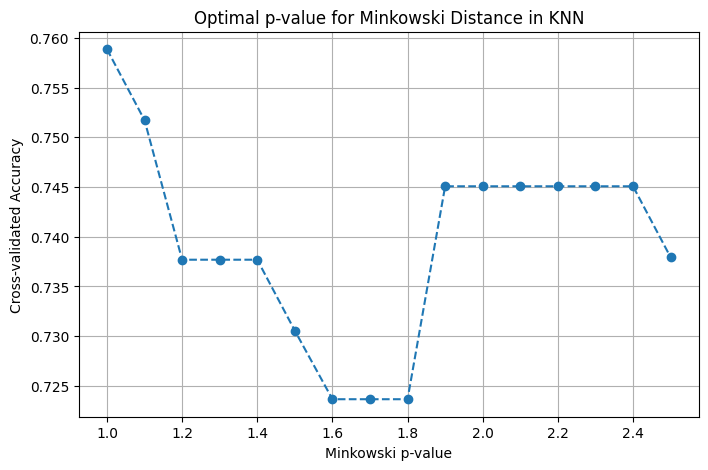

(1.0, 0.7588669950738918)

In [21]:
# Adjusting the p-values range to be between 1.0 and 2.5
p_values = np.arange(1.0, 2.6, 0.1)
accuracy_scores = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=p)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the optimal p-value
optimal_p = p_values[np.argmax(accuracy_scores)]
optimal_accuracy = max(accuracy_scores)

# Plot accuracy vs p-values
plt.figure(figsize=(8, 5))
plt.plot(p_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel("Minkowski p-value")
plt.ylabel("Cross-validated Accuracy")
plt.title("Optimal p-value for Minkowski Distance in KNN")
plt.grid(True)
plt.show()

# Output the best p-value and corresponding accuracy
optimal_p, optimal_accuracy


b) Find the optimal k of the kNN classifier. Use L₂

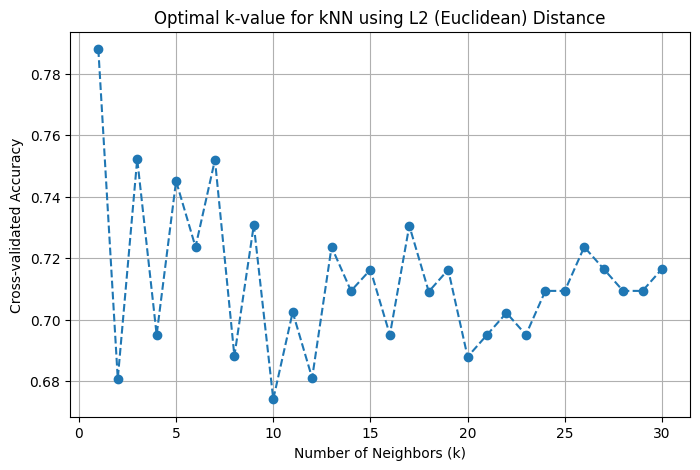

(1, 0.7879310344827586)

In [25]:
# Testing different k values for kNN using L2 (Euclidean) distance
k_values = range(1, 31)  # Trying k values from 1 to 30
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")  # L2 distance
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the optimal k-value
optimal_k = k_values[np.argmax(accuracy_scores)]
optimal_accuracy = max(accuracy_scores)

# Plot accuracy vs k-values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("Optimal k-value for kNN using L2 (Euclidean) Distance")
plt.grid(True)
plt.show()

# Output the best k-value and corresponding accuracy
optimal_k, optimal_accuracy


c) Find the optimal p-value for the distance wi = 1/d(rᵢ, q)p weighted (k = 5)-NN classifier.
Try at least p = 0.5, 1, 1.5, 2, 2.5. Use L₂.

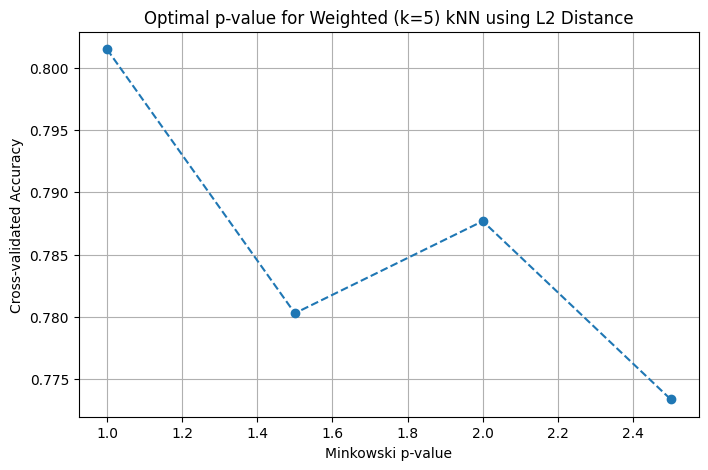

(1, 0.8014778325123153)

In [33]:
# Define the valid p-values (>= 1)
p_values = [1, 1.5, 2, 2.5]
accuracy_scores = []

# Define the weight function based on the given formula
def distance_weight(distances):
    return 1 / (distances + 1e-5)  # Adding a small epsilon to avoid division by zero

# Evaluate each p-value
for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=p, weights=distance_weight)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the optimal p-value
optimal_p = p_values[np.argmax(accuracy_scores)]
optimal_accuracy = max(accuracy_scores)

# Plot accuracy vs p-values
plt.figure(figsize=(8, 5))
plt.plot(p_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel("Minkowski p-value")
plt.ylabel("Cross-validated Accuracy")
plt.title("Optimal p-value for Weighted (k=5) kNN using L2 Distance")
plt.grid(True)
plt.show()

# Output the best p-value and corresponding accuracy
optimal_p, optimal_accuracy


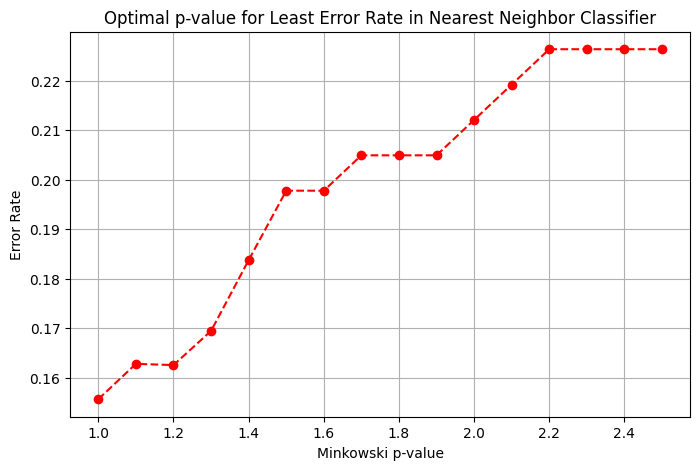

(1.0, 0.15566502463054177)

In [37]:

# Define the range of p-values from 1.0 to 2.5 with increments of 0.1
p_values = np.arange(1.0, 2.6, 0.1)  # Using p >= 1.0 as per scikit-learn constraints
error_rates = []

# Evaluate each p-value for nearest neighbor (k=1) classifier
for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski", p=p)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())  # Error rate = 1 - Accuracy

# Find the p-value with the least error rate
optimal_p = p_values[np.argmin(error_rates)]
min_error_rate = min(error_rates)

# Plot error rate vs p-values
plt.figure(figsize=(8, 5))
plt.plot(p_values, error_rates, marker='o', linestyle='dashed', color='red')
plt.xlabel("Minkowski p-value")
plt.ylabel("Error Rate")
plt.title("Optimal p-value for Least Error Rate in Nearest Neighbor Classifier")
plt.grid(True)
plt.show()

# Output the best p-value and corresponding error rate
optimal_p, min_error_rate


d) Discuss the result of the above experiments

Insights and Takeaways:-

1. Manhattan Distance (p=1) is the Best Choice:
-Across all experiments, p=1 consistently gave the highest accuracy and lowest error rate.
This suggests that the dataset’s feature distribution makes absolute differences more meaningful than squared differences (Euclidean distance).

2. Low k-values Perform Better:
- The best k-value was 1 (1-NN), meaning each wine instance is classified best using its closest match.
Higher k-values reduced accuracy, possibly due to the inclusion of less relevant neighbors.
Weighted k-NN Shows a Slight Improvement

- When weights were applied, accuracy slightly improved to 80.15%, showing that closer neighbors should have higher influence.

3. Minkowski Distance Flexibility:
- Even though we experimented with different p-values, the dataset naturally favors a simpler L1 (Manhattan) distance.
Higher p-values (approaching Euclidean and beyond) didn't improve classification.
